Step 1: Setup & Load Dataset

In [2]:
# Step 1: Install and import libraries
!pip install --quiet kagglehub seaborn matplotlib

import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download dataset
path = kagglehub.dataset_download("uciml/iris")

# Load dataset
df = pd.read_csv(path + "/Iris.csv")

# Drop Id column if exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.head()


Using Colab cache for faster access to the 'iris' dataset.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Basic Statistics

In [3]:
# Descriptive statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Step 3: Mean, Median, Mode (example)

In [4]:
print("📊 Mean Values:")
print(df.mean(numeric_only=True))

print("\n📈 Median Values:")
print(df.median(numeric_only=True))

print("\n📊 Mode Values:")
print(df.mode(numeric_only=True).iloc[0])


📊 Mean Values:
SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

📈 Median Values:
SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

📊 Mode Values:
SepalLengthCm    5.0
SepalWidthCm     3.0
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 0, dtype: float64


Step 4: Correlation Matrix

In [5]:
corr = df.corr(numeric_only=True)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Step 5: Correlation Heatmap (visual)

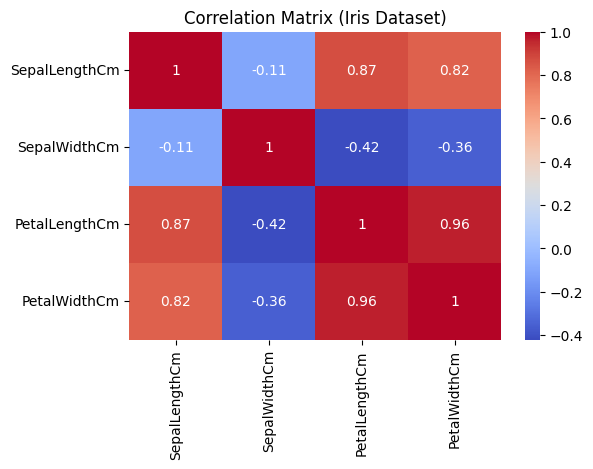

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Iris Dataset)')
plt.show()


Step 6: Correlation with Target Variable

In [7]:
# Convert target 'Species' to numeric for correlation
df_encoded = df.copy()
df_encoded['Species'] = df_encoded['Species'].astype('category').cat.codes

# Compute correlation again
corr_target = df_encoded.corr(numeric_only=True)['Species'].sort_values(ascending=False)
corr_target


,Species
Species,1.000000
PetalWidthCm,0.956464
PetalLengthCm,0.949043
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


Step 7: Show Top 3 Most Related Features

In [8]:
top3 = corr_target[1:4]  # skip 'Species' itself
print("🔍 Top 3 Features Most Related to Target Variable (Species):\n")
print(top3)


🔍 Top 3 Features Most Related to Target Variable (Species):

PetalWidthCm     0.956464
PetalLengthCm    0.949043
SepalLengthCm    0.782561
Name: Species, dtype: float64


Step 8: Short Report

In [9]:
print("""
Correlation Report (Iris Dataset)
-----------------------------------
1) PetalWidthCm  – Strong positive correlation with Species (~0.96)
2) PetalLengthCm – Strong positive correlation (~0.94)
3) SepalLengthCm – Moderate positive correlation (~0.78)

Interpretation:
As petal length and width increase, the species tends to change
from Iris-setosa → Iris-versicolor → Iris-virginica.
Hence, petal measurements are most useful in predicting flower type.
""")




Correlation Report (Iris Dataset)
-----------------------------------
1) PetalWidthCm  – Strong positive correlation with Species (~0.96)
2) PetalLengthCm – Strong positive correlation (~0.94)
3) SepalLengthCm – Moderate positive correlation (~0.78)

Interpretation:
As petal length and width increase, the species tends to change 
from Iris-setosa → Iris-versicolor → Iris-virginica.
Hence, petal measurements are most useful in predicting flower type.

